In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# сигмоидная функция потерь (ANN)
def loss(w, x, y):
    M = np.dot(w,x)*y # скалярное произведение вектора x на w, умноженное на метку класса (+1, -1)
    return 2/(1+np.exp(M))

In [3]:
# производная сигмоидной функции потерь по вектору w
def dfl (w, x, y):
    M = np.dot(w,x)*y
    return -2*(1+np.exp(M))**(-2)*np.exp(M)*x*y

In [14]:
# обучающая выборка с тремя признаками (третий - константа b0=1)
x_train = [[10,50], [20,30], [25,30], [20,60], [15, 70], [40,40], [30, 45], [20,45], [40,30], [7,35]]
x_train = [x + [1] for x in x_train]
x_train = np.array(x_train)
print (x_train)
print(x_train.shape)

y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

n_train = len(x_train)
w = [0, 0, 0] # начальные весовые коэффициенты
nt = 0.0005 # шаг сходимости SGD
lm = 0.01 # скорость "забывания" для Q
N = 500 # число итераций SGD

[[10 50  1]
 [20 30  1]
 [25 30  1]
 [20 60  1]
 [15 70  1]
 [40 40  1]
 [30 45  1]
 [20 45  1]
 [40 30  1]
 [ 7 35  1]]
(10, 3)


* Скорость обучения (learning rate) - это параметр, который определяет размер шага, который алгоритм градиентного спуска делает в пространстве параметров модели при обновлении их значений. 

* Скорость забывания для Q обозначает изменение скорости обучения для параметра Q в процессе обучения


In [15]:
# print ([(x, w, y) for x, y in zip (x_train, y_train)])
Q = np.mean([loss(x, w, y) for x, y in zip (x_train, y_train)]) # показатель качества
Q_plot = [Q] # формируем график изменения показателя Q

for i in range (N):
    k = np.random.randint(0, n_train - 1) # случайный выбор наблюдения
    ek = loss (w, x_train[k], y_train[k]) # вычисление функции потерь 
    w = w - nt*dfl(w, x_train[k], y_train[k]) # шаг SGD: корректировка весов
    Q = lm*ek + (1-lm)*Q # пересчет показателя качества ("экспоненциальное скользящее среднее")
    Q_plot.append(Q)

print(w)
print (Q_plot)

[ 0.32554902 -0.17154068  0.00491143]
[1.0, 1.0, 0.996199440879765, 1.001903134263217, 1.0045951272230291, 1.0053591737671534, 1.0049247001988884, 1.000349235110858, 0.9947993557364412, 0.9996844521543471, 1.003324228433644, 0.996466373839285, 1.0004209938745212, 1.0027026845861946, 0.9971042722419222, 0.9906518031375278, 0.9828310241295417, 0.9738724609199679, 0.9800402785927956, 0.9726634755152179, 0.9758301193700119, 0.9688537081708204, 0.9609567985783357, 0.9520418344662884, 0.9440138762224533, 0.9495656908498816, 0.9429610730812216, 0.9506479534364378, 0.9548537158264115, 0.9475555367965791, 0.939647231643315, 0.9418205045854813, 0.9346494599460936, 0.9390092538778689, 0.9320795947921133, 0.9318121263013296, 0.932658627025608, 0.9330610855961277, 0.9291370233209649, 0.9238364298826265, 0.9233493213263061, 0.9175114934877342, 0.9141476310121704, 0.9065238422253037, 0.9025142977028491, 0.8940692099028082, 0.8864363188766118, 0.8926116795482024, 0.8955411233580315, 0.8879338307192048

In [24]:
# формирование графика разделяющей линии
line_x = list(range(max(x_train[:, 0])))
line_y = [-x * w[0] / w[1] - w[2] for x in line_x]
#line_y2 = [-x * w[0] / w[1] - w[2]/w[1] for x in line_x]

x_0 = x_train[y_train == 1]
x_1 = x_train[y_train == -1]

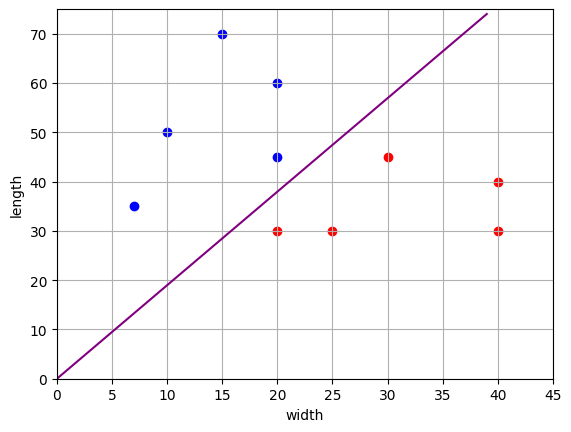

In [25]:
plt.scatter(x_0[:, 0], x_0[:,1], color = 'red')
plt.scatter(x_1[:, 0], x_1[:, 1], color = 'blue')
plt.plot(line_x, line_y, color = 'purple')
#plt.plot(line_x, line_y2, color = 'yellow')

plt.xlim ([0, 45])
plt.ylim ([0, 75])
plt.ylabel("length")
plt.xlabel("width")
plt.grid(True)
plt.show()